In [5]:
from __future__ import print_function

import pickle
import re
import sys

from future.utils import itervalues
from future.utils import iterkeys
from future.utils import iteritems

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
def report_plot(descriptions, iters_count, samples_count, output_path):
    providers = list()
    data = dict()
    colors = dict()
    linestyles = dict()
    for name, path, color, linestyle in descriptions:
        with open(path, 'r') as f:
            data[name] = pickle.load(f)
        colors[name] = color
        linestyles[name] = linestyle
        providers.append(name)
            
    results = dict()
    results['ppmi'] = {
        name : np.mean(
            [
                [
                    exp_doc['top_[5,10,20,30]_pmi'][sample_num][iter_num][1][3]
                    for iter_num in range(iters_count)
                ]
                for sample_num in range(samples_count)
            ],
            axis=0
        )
        for name, exp_doc in iteritems(data)
    }
    
    for metric in ['phi_sparsity', 'top_100_avg_jaccard', 'train_perplexity']:
        results[metric] = {
            name : np.mean(
                [
                    [
                        exp_doc[metric][sample_num][iter_num]
                        for iter_num in range(iters_count)
                    ]
                    for sample_num in range(samples_count)
                ],
                axis=0
            )
            for name, exp_doc in iteritems(data)
        }
        
    
    fig = plt.figure(figsize=(12, 10))
    major_ticks = np.arange(0, iters_count + 1, iters_count / 10)

    lines = []
    def plot(name, ylabel):
        for provider in providers:
            values = results[name][provider]
            iter_range = range(1, len(values) + 1)
            lines.extend(plt.plot(
                iter_range, values, 
                color=colors[provider], 
                linestyle=linestyles[provider]
            ))
        plt.xlabel(u'Номер итерации')#'Iteration')
        plt.ylabel(ylabel)

    ax = fig.add_subplot(2, 2, 1)
    ax.set_xticks(major_ticks)
    plot('train_perplexity', u'Перплексия')#u'Sparsity')
    plt.grid()
    
    ax = fig.add_subplot(2, 2, 2)
    ax.set_xticks(major_ticks)
    plot('phi_sparsity', u'Разреженность')#u'Sparsity')
    plt.grid()
    
    ax = fig.add_subplot(2, 2, 3)
    ax.set_xticks(major_ticks)
    plot('top_100_avg_jaccard', u'Средняя мера Жаккара')#'Average jaccard distance')
    plt.grid()
    
    ax = fig.add_subplot(2, 2, 4)
    ax.set_xticks(major_ticks)
    plot('ppmi', 'PPMI')
    plt.grid()
    
    plt.tight_layout()
    
    plt.subplots_adjust(bottom=.15)
    lgd = plt.figlegend(lines, providers, loc='lower center', ncol=len(providers))
    
    plt.savefig(output_path, format="eps")
    plt.show()

In [18]:
font = {
    'family' : 'sans-serif',
    'size'   : 15,
    'sans-serif': ['Helvetica']
}
plt.rc('font', **font)

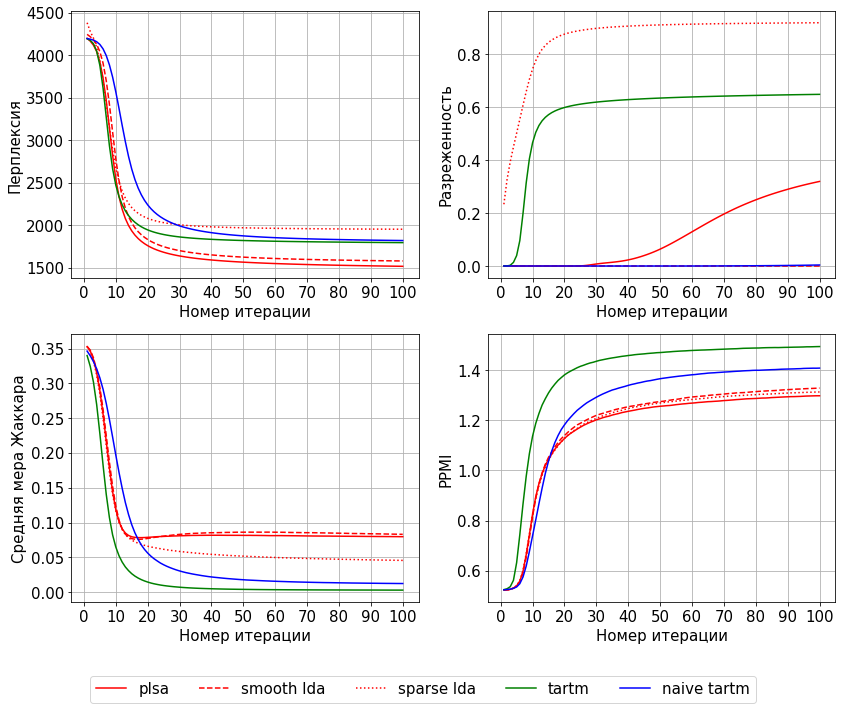

In [19]:
report_plot([
    ('plsa', '20news_experiment/20news_25t_base_0.0_0.0.pkl', 'red', '-'),
    ('smooth lda', '20news_experiment/20news_25t_base_0.1_0.0.pkl', 'red', '--'),
    ('sparse lda', '20news_experiment/20news_25t_base_-0.1_0.0.pkl', 'red', ':'),
    ('tartm', '20news_experiment/20news_25t_artm_0.0_0.0_False.pkl', 'green', '-'),
    #('modified tartm', '20news_experiment/20news_25t_artm_0.0_0.0_True.pkl', 'green', '--'),
    ('naive tartm', '20news_experiment/20news_25t_naive_0.0_0.0.pkl', 'blue', '-'),
], iters_count=100, samples_count=100, output_path='20news_result.eps')

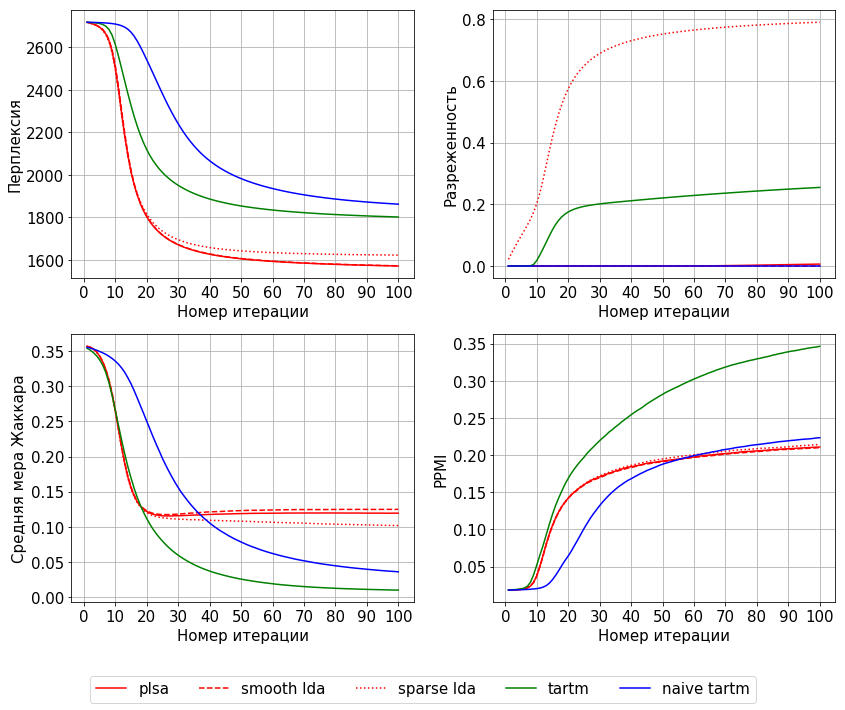

In [20]:
report_plot([
    ('plsa', 'nips_experiment/NIPS_50t_base_0.0_0.0.pkl', 'red', '-'),
    ('smooth lda', 'nips_experiment/NIPS_50t_base_0.1_0.0.pkl', 'red', '--'),
    ('sparse lda', 'nips_experiment/NIPS_50t_base_-0.1_0.0.pkl', 'red', ':'),
    ('tartm', 'nips_experiment/NIPS_50t_artm_0.0_0.0_False.pkl', 'green', '-'),
    #('modified tartm', 'nips_experiment/NIPS_50t_artm_0.0_0.0_True.pkl', 'green', '--'),
    ('naive tartm', 'nips_experiment/NIPS_50t_naive_0.0_0.0.pkl', 'blue', '-'),
], iters_count=100, samples_count=50, output_path='nips_result.eps')

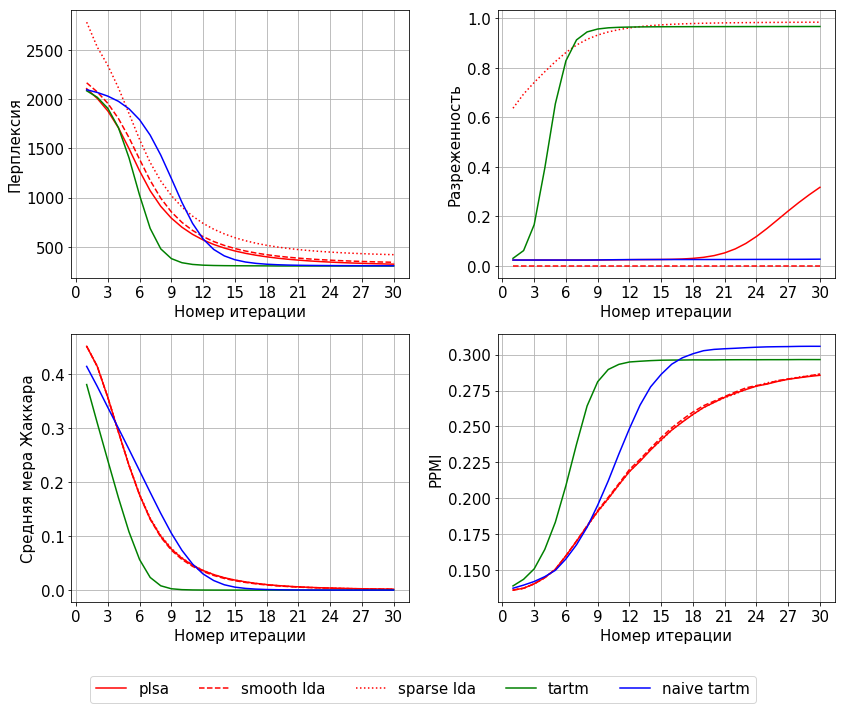

In [21]:
report_plot([
    ('plsa', 'twitter_experiment/twitter_50t_base_0.0_0.0.pkl', 'red', '-'),
    ('smooth lda', 'twitter_experiment/twitter_50t_base_0.1_0.0.pkl', 'red', '--'),
    ('sparse lda', 'twitter_experiment/twitter_50t_base_-0.1_0.0.pkl', 'red', ':'),
    ('tartm', 'twitter_experiment/twitter_50t_artm_0.0_0.0_False.pkl', 'green', '-'),
    #('modified tartm', 'twitter_experiment/twitter_50t_artm_0.0_0.0_True.pkl', 'green', '--'),
    ('naive tartm', 'twitter_experiment/twitter_50t_naive_0.0_0.0.pkl', 'blue', '-'),
], iters_count=30, samples_count=20, output_path='twitter_result.eps')